In [1]:
# Complete Applied Question #8 on page 327 of ISLR Python.



### Applied Question Page No: 335
Fit some of the non-linear models investigated in this chapter to the
Auto data set. Is there evidence for non-linear relationships in this
data set? Create some informative plots to justify your answer.rs

In [3]:
import os

In [4]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [6]:
from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

In [7]:
print(os.getcwd()) 

C:\Users\ghimi


In [8]:
# Import the ISLP package
import ISLP

# Load the Auto dataset
from ISLP import load_data

# Load the 'Auto' dataset
auto_data = load_data('Auto')

# Display the first few rows of the dataset
auto_data.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [20]:
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
summarize ,poly)

In [22]:
# Get summary statistics of the dataset
auto_data.describe()

# Check for missing values
auto_data.isnull().sum()

# Display the first few rows
auto_data.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [24]:
# Extract features and response variable
X = auto_data['horsepower'].values.reshape(-1, 1)
y = auto_data['mpg'].values

## Polynomial Regression 
Polynomial Regression is a form of regression analysis where the relationship between the independent variable 
𝑋 and the dependent variable 𝑦 is modeled as an nth-degree polynomial. Unlike linear regression, which fits a straight line, polynomial regression can fit a curve.


In [52]:
# Fit polynomial regression models with different degrees
degrees = [1, 2, 3]
models = []

for degree in degrees:
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)

In [54]:
 # Fit linear regression
model = LinearRegression()
model.fit(X_poly, y)
models.append(model)
    

In [56]:
 # Predict
y_pred = model.predict(X_poly)

In [58]:
 # Calculate MSE
mse = mean_squared_error(y, y_pred)
print(f"Degree {degree} - Mean Squared Error: {mse}")

Degree 3 - Mean Squared Error: 18.944989814485915


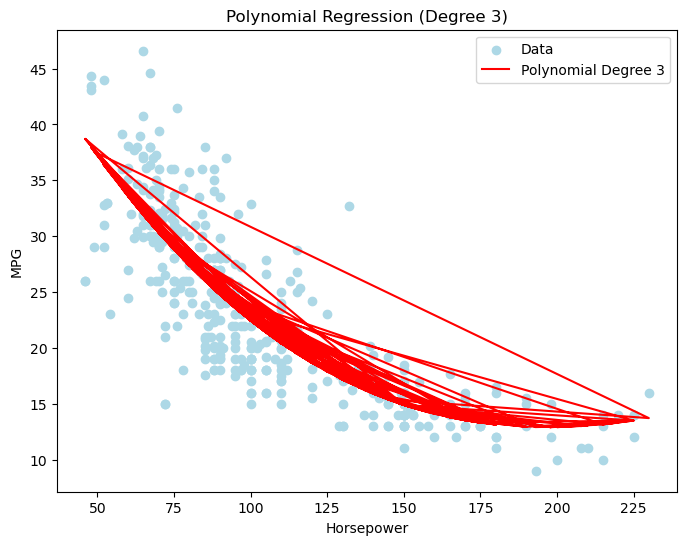

In [60]:
# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(X, y, label='Data', color='lightblue')
plt.plot(X, y_pred, label=f'Polynomial Degree {degree}', color='red')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title(f'Polynomial Regression (Degree {degree})')
plt.legend()
plt.show()

In [ ]:
## Visualize Residuals

In [64]:
# Plot residuals for each degree
# Loop through each degree
for degree in degrees:
    # Create polynomial features for the given degree
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)
    
    # Fit the Linear Regression model
    model = LinearRegression()
    model.fit(X_poly, y)
    models.append(model)  # Store the model
    
    # Predict the response
    y_pred = model.predict(X_poly)
    
    # Calculate residuals
    residuals = y - y_pred

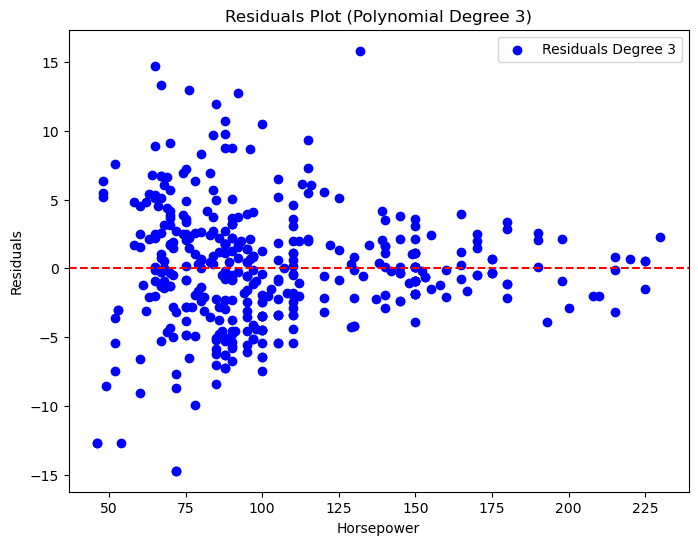

In [68]:
# # Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(X, residuals, color='blue', label=f'Residuals Degree {degree}')
plt.axhline(y=0, color='red', linestyle='--')  # Add horizontal line at y=0
plt.xlabel('Horsepower')
plt.ylabel('Residuals')
plt.title(f'Residuals Plot (Polynomial Degree {degree})')
plt.legend()
plt.show()

## Support Vector Machines (SVM) with Non-linear Kernels

In [76]:
!pip install pygam

In [83]:
# Define predictor variables (excluding 'name')
X = auto_data[['horsepower', 'weight', 'acceleration', 'displacement', 'cylinders', 'year']].values
y = auto_data['mpg'].values

In [85]:
# Initialize the GAM model
gam = LinearGAM(s(0) + s(1) + s(2) + s(3) + s(4) + s(5))  # s() specifies that each feature has a non-linear smooth effect.

# Fit the model
gam.fit(X, y)

LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
   max_iter=100, scale=None, 
   terms=s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + intercept, 
   tol=0.0001, verbose=False)

In [87]:
# Print the summary of the model
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     56.4656
Link Function:                     IdentityLink Log Likelihood:                                 -1110.6087
Number of Samples:                          392 AIC:                                             2336.1486
                                                AICc:                                             2356.295
                                                GCV:                                                8.5134
                                                Scale:                                              6.3391
                                                Pseudo R-Squared:                                   0.9107
Feature Function                  Lam

C:\Users\ghimi\AppData\Local\Temp\ipykernel_22648\1151554740.py:2: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()



s(0), s(1), etc., indicate that smooth functions will be applied to the corresponding predictors. These smooth terms allow for non-linear relationships between the predictors and the response.

Visualize the non-linear relationships: After fitting the GAM, we can plot the non-linear functions learned for each predictor.

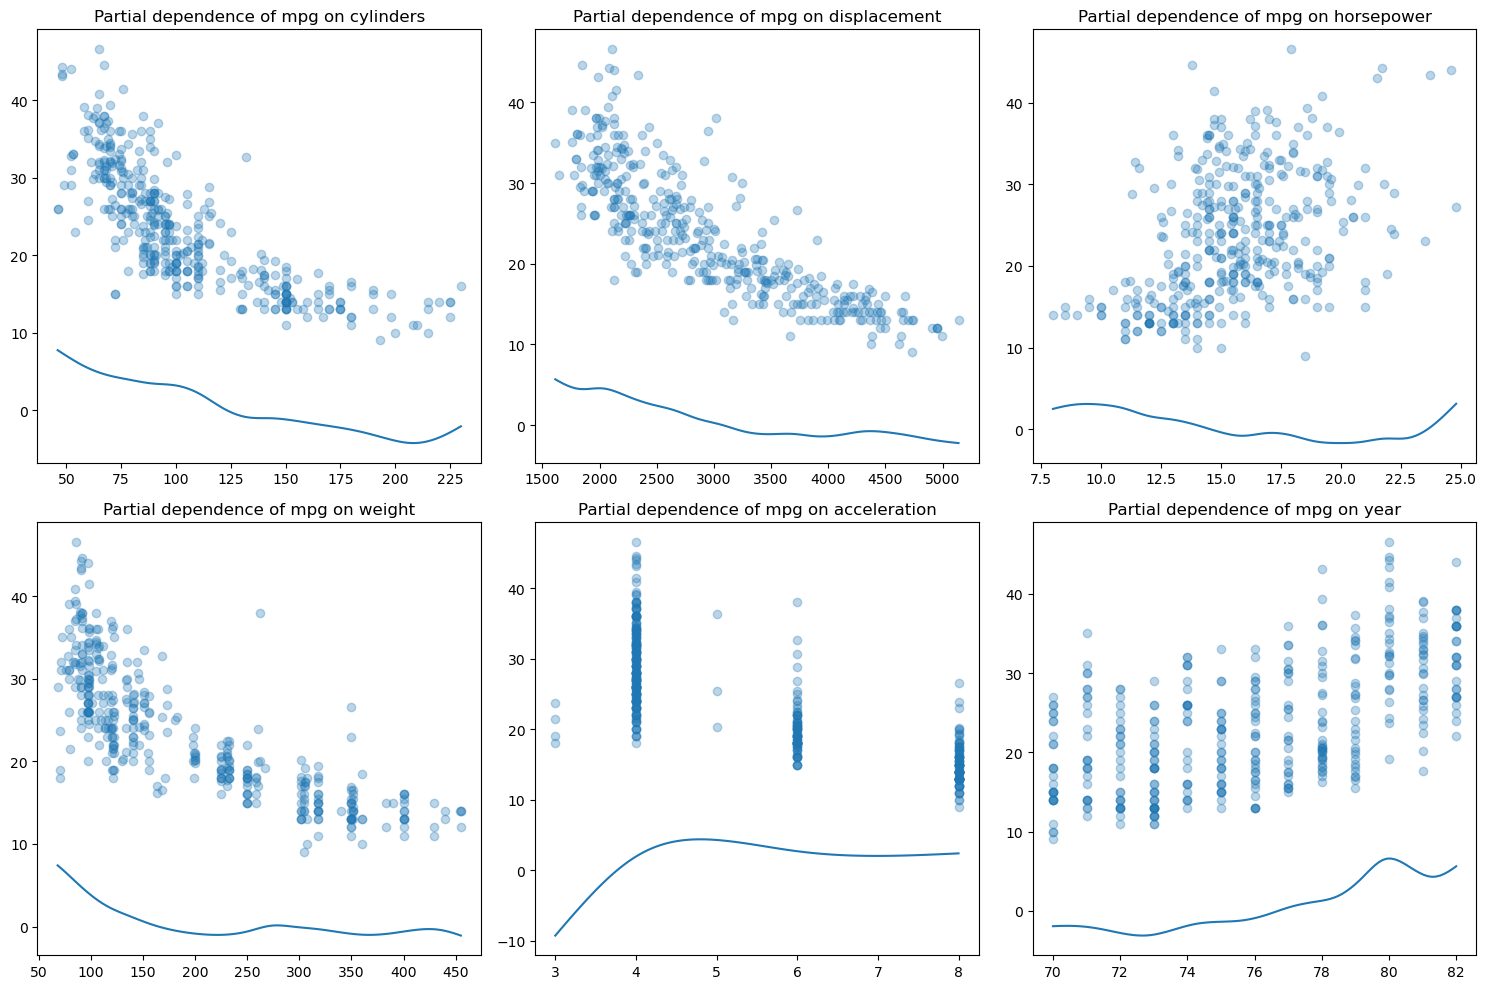

In [90]:
plt.figure(figsize=(15, 10))

for i in range(X.shape[1]):
    plt.subplot(2, 3, i+1)
    XX = gam.generate_X_grid(term=i)
    plt.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    plt.scatter(X[:, i], y, alpha=0.3)
    plt.title(f'Partial dependence of mpg on {auto_data.columns[i+1]}')

plt.tight_layout()
plt.show()


These partial dependence plots indicate that Generalized Additive Models (GAMs) can effectively capture non-linear relationships in the data. For this dataset, variables such as cylinders, displacement, and weight have clear non-linear negative impacts on fuel efficiency (mpg), while year has a positive impact. Other variables like acceleration and horsepower show more subtle, weaker effects.

The relationship between cylinders and mpg is strongly non-linear, as shown by the steep decrease in mpg as the number of cylinders increases. The effect levels off for higher values of cylinders, which is a sign of a non-linear effect

The drop in mpg is steep for lower displacement values, but the curve flattens out for larger engine sizes. This non-linear pattern indicates diminishing returns as displacement increases, suggesting a non-linear relationship.

Weight shows a similar non-linear trend where the drop in mpg is more pronounced for lighter cars, and the effect decreases for heavier cars. This indicates that the relationship between weight and mpg is non-linear.

The relationship between acceleration and mpg is less straightforward, but there is a noticeable upward trend in the middle range of acceleration, indicating non-linearity.

There is a non-linear increase in mpg as the year increases, with a more gradual increase over time. The improvement in fuel efficiency levels off slightly after 1980.r

## Lets create further scatter plots and fit polynomial regression curves or smooth splines to visually confirm the non-linear relationships between mpg and various predictors.

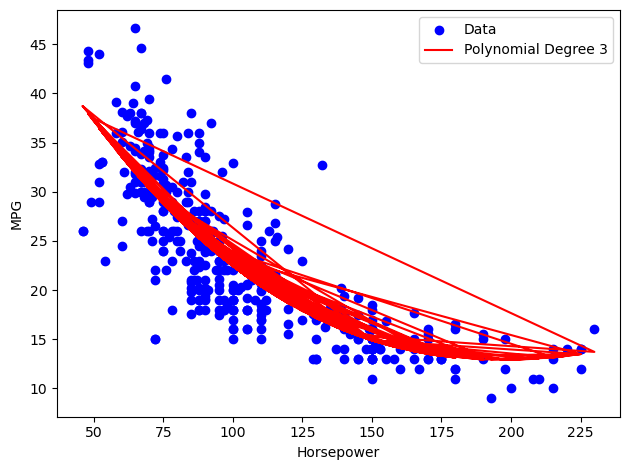

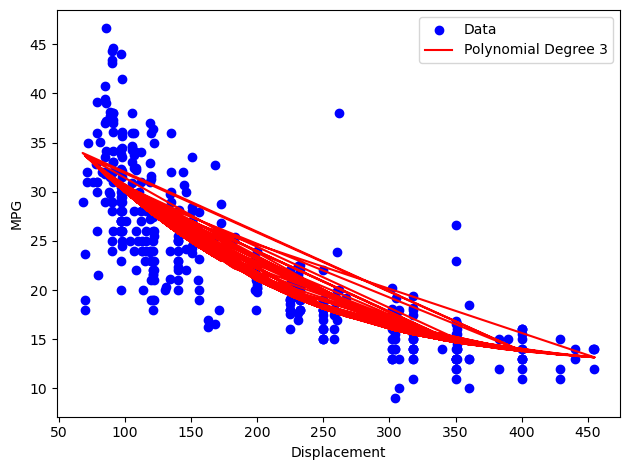

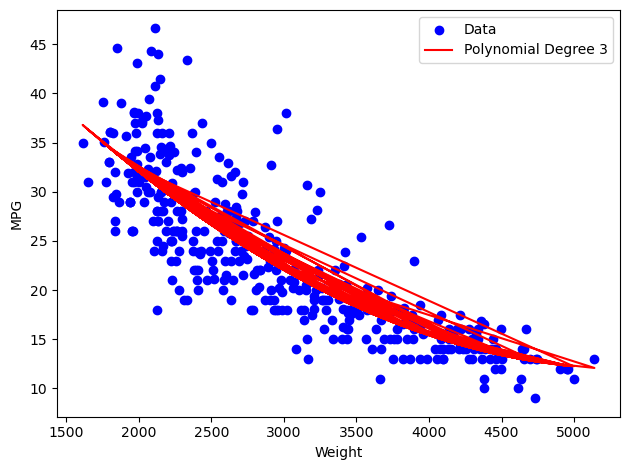

In [165]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Function to fit polynomial regression and plot results
def plot_polynomial_fit(X, y, degree, xlabel):
    # Reshape X for sklearn
    X = X.reshape(-1, 1)
    
    # Fit polynomial regression
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    
    # Fit linear regression to the polynomial features
    model = LinearRegression().fit(X_poly, y)
    
    # Predict the values
    y_pred = model.predict(X_poly)
    
    # Scatter plot of the actual data points
    plt.scatter(X, y, color='blue', label='Data')
    
    # Line plot of the predicted values (regression curve)
    plt.plot(X, y_pred, color='red', label=f'Polynomial Degree {degree}')
    
    # Label the axes
    plt.xlabel(xlabel)
    plt.ylabel('MPG')
    
    # Show legend and plot
    plt.legend()
    plt.tight_layout()
    plt.show()

# Example usage with Auto dataset variables
plot_polynomial_fit(auto_data['horsepower'].values, y, degree=3, xlabel='Horsepower')
plot_polynomial_fit(auto_data['displacement'].values, y, degree=3, xlabel='Displacement')
plot_polynomial_fit(auto_data['weight'].values, y, degree=3, xlabel='Weight')


### Smoothed Regression using seaborn's

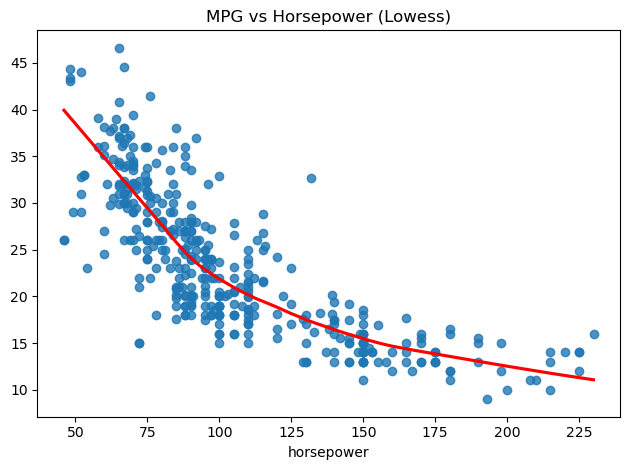

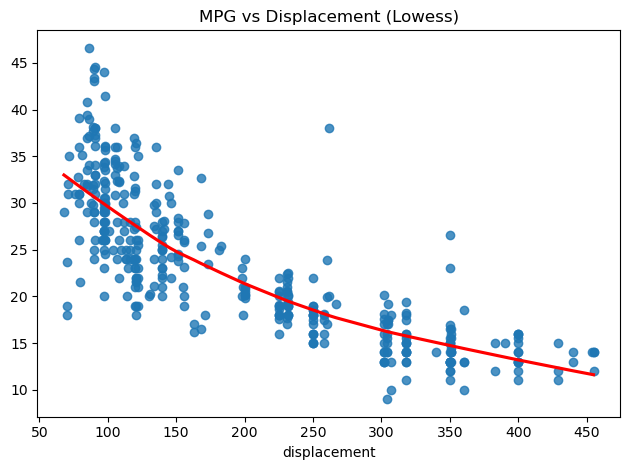

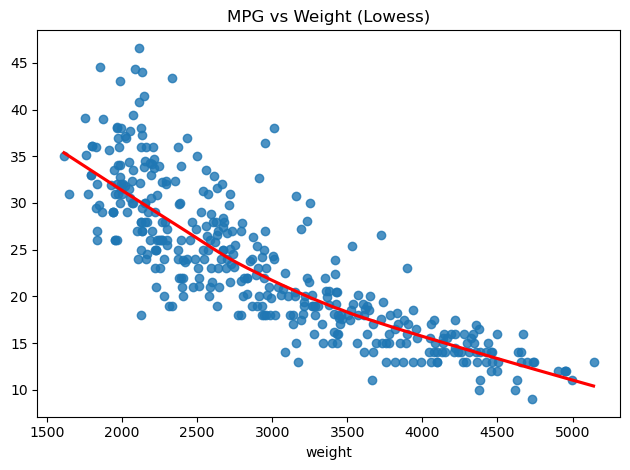

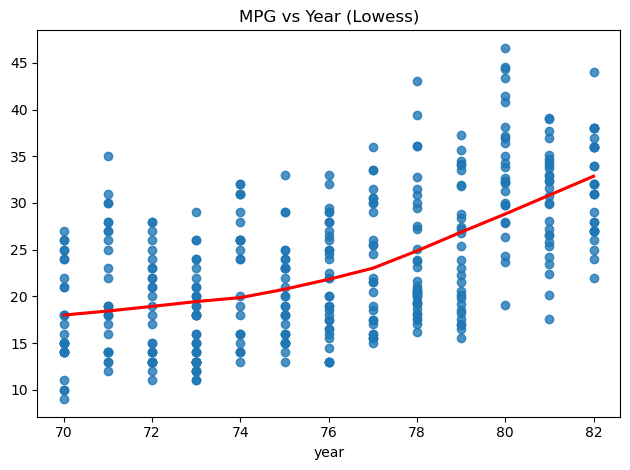

In [173]:
# Using lowess to show non-linear trends in Seaborn's regplot
sns.regplot(x=auto_data['horsepower'], y=y, lowess=True, line_kws={'color':'red'})
plt.title('MPG vs Horsepower (Lowess)')
plt.tight_layout()
plt.show()

sns.regplot(x=auto_data['displacement'], y=y, lowess=True, line_kws={'color':'red'})
plt.title('MPG vs Displacement (Lowess)')
plt.tight_layout()
plt.show()

sns.regplot(x=auto_data['weight'], y=y, lowess=True, line_kws={'color':'red'})
plt.title('MPG vs Weight (Lowess)')
plt.tight_layout()
plt.show()

sns.regplot(x=auto_data['year'], y=y, lowess=True, line_kws={'color':'red'})
plt.title('MPG vs Year (Lowess)')
plt.tight_layout()
plt.show()


